In [337]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [338]:
churn = pd.read_csv('churn_data.csv')
customer = pd.read_csv('customer_data.csv')
internet = pd.read_csv('internet_data.csv')

In [339]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [340]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [341]:
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [342]:
print(churn.shape, customer.shape,  internet.shape)

(7043, 9) (7043, 5) (7043, 9)


In [358]:
df = pd.merge(pd.merge(churn,customer,on='customerID'),internet,on='customerID')

In [359]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [361]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [360]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [346]:
df = df[~df['TotalCharges'].apply(lambda x : x.isspace())]

In [347]:
df.drop('customerID', inplace=True, axis=1)

In [348]:
yes_no_cols = ['PhoneService', 'PaperlessBilling',  'Partner', 'Dependents', 'Churn']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

In [349]:
df['Contract']=df['Contract'].map({'Month-to-month':'month_con', 'Two year':'two_year_con', 'One year':'one_year_con'})
df['InternetService']=df['InternetService'].map({'Fiber optic':'Fiber_optic', 'DSL':'DSL', 'No':'No'})
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':'electronic_check', 'Mailed check':'mailed_check', 'Bank transfer (automatic)':'bank_transsfer', 'Credit card (automatic)':'credit_card'})

In [350]:
cat_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' ]
for x in cat_cols:
    df[x] = df[x].apply(lambda y: x+'_'+'_'.join(y.split()))

In [351]:
cat_cols_dum = ['Contract', 'PaymentMethod', 'gender', 'InternetService'] + cat_cols
dumm = pd.get_dummies(df[cat_cols_dum], drop_first=True, dtype=int)
df.drop(cat_cols_dum, inplace=True, axis = 1)
df = pd.concat([df, dumm], axis=1)

In [352]:
df['tenure'] = df['tenure'].astype(int)
df['MonthlyCharges']=df['MonthlyCharges'].astype(float)
df['TotalCharges']=df['TotalCharges'].astype(float)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   tenure                                                 7032 non-null   int64  
 1   PhoneService                                           7032 non-null   int64  
 2   PaperlessBilling                                       7032 non-null   int64  
 3   MonthlyCharges                                         7032 non-null   float64
 4   TotalCharges                                           7032 non-null   float64
 5   Churn                                                  7032 non-null   int64  
 6   SeniorCitizen                                          7032 non-null   int64  
 7   Partner                                                7032 non-null   int64  
 8   Dependents                                           

In [354]:
df.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_one_year_con,...,OnlineBackup_OnlineBackup_No_internet_service,OnlineBackup_OnlineBackup_Yes,DeviceProtection_DeviceProtection_No_internet_service,DeviceProtection_DeviceProtection_Yes,TechSupport_TechSupport_No_internet_service,TechSupport_TechSupport_Yes,StreamingTV_StreamingTV_No_internet_service,StreamingTV_StreamingTV_Yes,StreamingMovies_StreamingMovies_No_internet_service,StreamingMovies_StreamingMovies_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.162400,0.482509,0.298493,0.209329,...,0.216155,0.344852,0.216155,0.343857,0.216155,0.290102,0.216155,0.384386,0.216155,0.388367
std,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.368844,0.499729,0.457629,0.406858,...,0.411650,0.475354,0.411650,0.475028,0.411650,0.453842,0.411650,0.486484,0.411650,0.487414
min,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [355]:
import matplotlib.pyplot as plt
import seaborn as sns 

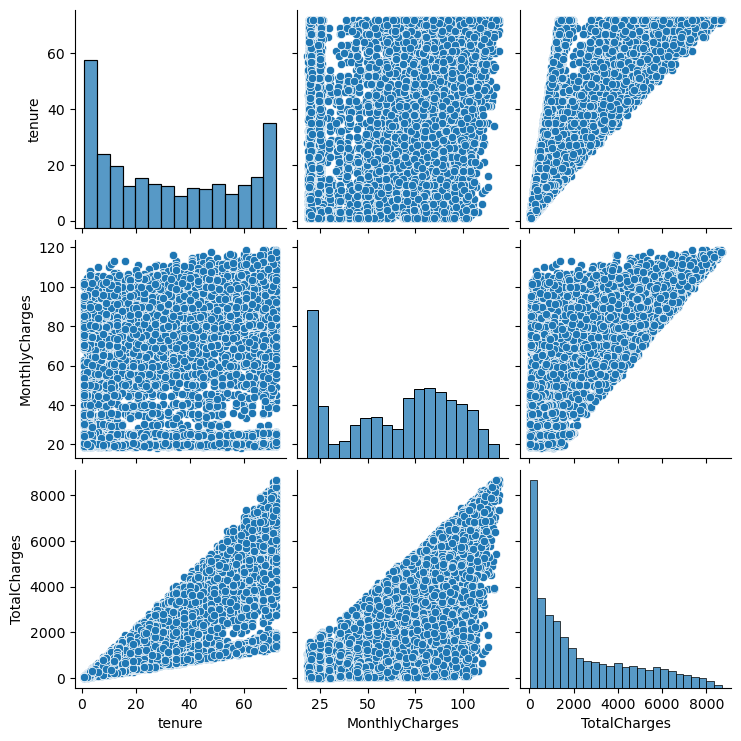

In [356]:
sns.pairplot(df[num_cols])

['PhoneService', 'PaperlessBilling', 'Partner', 'Dependents', 'Churn']


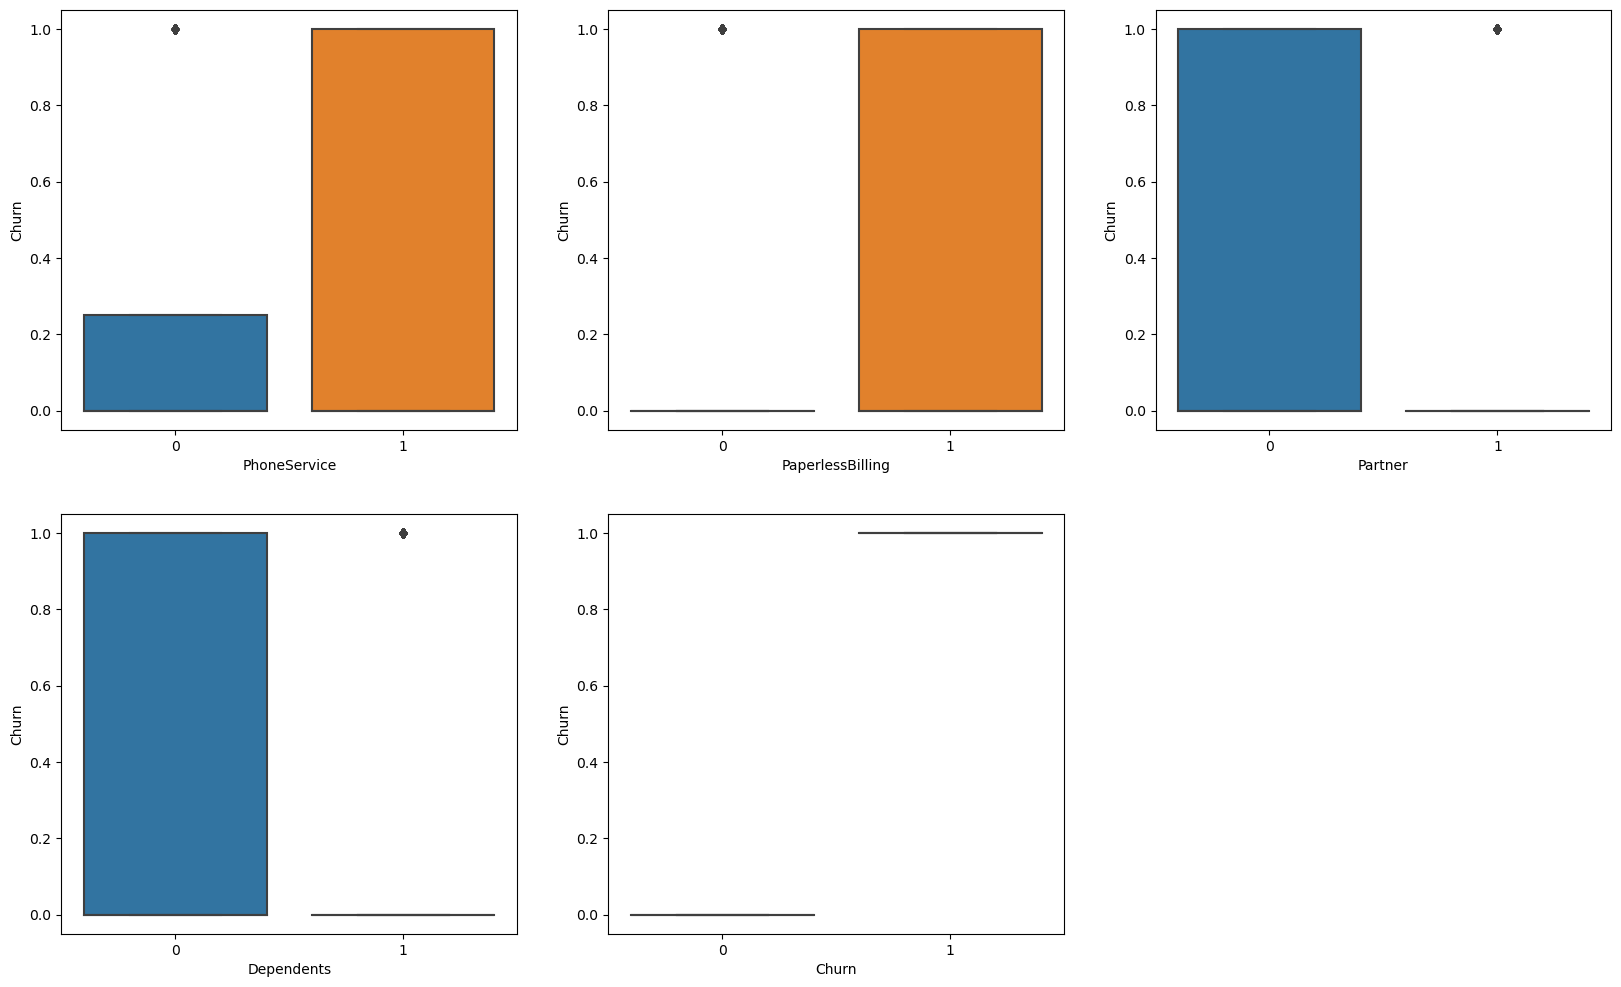

In [357]:
plt.figure(figsize=(20, 12))
print(yes_no_cols)
for x in range(len(yes_no_cols)):
    col = yes_no_cols[x]
    plt.subplot(2,3,x+1)
    sns.boxplot(x=col, y = 'Churn', data=df)